In [ ]:
## Install the library
!pip install textblob
!pip install pandas
!pip install sweetviz
!pip install pandas_profiling

In [199]:
# Importing the libraray
import pandas as pd
from textblob import TextBlob
import scipy.stats as stats
import re
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import string
from nltk.corpus import stopwords
from pandas_profiling import ProfileReport
import sweetviz

In [200]:
df = pd.read_json('/Users/abhisheknegi/Desktop/Rapid/Project/scrapy/scrapy/dineout/data/dineout-delhi.json')
df

,Name,Location,Price,Cuisine Type,Rating,Total votes,Total Review,Link,User Name,Post Date,Review
0,Ardor 2.1 Restaurant and Lounge,"Connaught Place,Central Delhi",₹ 2000,"North Indian, Chinese, Italian, Continental",4.1,1454 votes,321 Reviews,https://www.dineout.co.in/delhi/ardor-21-resta...,Komal,Posted on 27 Jul 2021,w
1,Ardor 2.1 Restaurant and Lounge,"Connaught Place,Central Delhi",₹ 2000,"North Indian, Chinese, Italian, Continental",4.1,1454 votes,321 Reviews,https://www.dineout.co.in/delhi/ardor-21-resta...,Preeti Verma,Posted on 26 Jul 2021,delayed service.\ngood food.
2,Ardor 2.1 Restaurant and Lounge,"Connaught Place,Central Delhi",₹ 2000,"North Indian, Chinese, Italian, Continental",4.1,1454 votes,321 Reviews,https://www.dineout.co.in/delhi/ardor-21-resta...,Abhinav Agarwal,Posted on 26 Jul 2021,very bad taste. not recommended for food lovers.
3,Ardor 2.1 Restaurant and Lounge,"Connaught Place,Central Delhi",₹ 2000,"North Indian, Chinese, Italian, Continental",4.1,1454 votes,321 Reviews,https://www.dineout.co.in/delhi/ardor-21-resta...,Ashutosh Shandilya,Posted on 24 Jul 2021,chicken was undercooked
4,Ardor 2.1 Restaurant and Lounge,"Connaught Place,Central Delhi",₹ 2000,"North Indian, Chinese, Italian, Continental",4.1,1454 votes,321 Reviews,https://www.dineout.co.in/delhi/ardor-21-resta...,VARUN GOYAL,Posted on 20 Jul 2021,They denied to give the discount...gave lame e...
...,...,...,...,...,...,...,...,...,...,...,...
39572,My Bar Square,"Connaught Place,Central Delhi",₹ 2000,"Finger Food, Italian, Chinese, Continental",3.9,548 votes,63 Reviews,https://www.dineout.co.in/delhi/my-bar-square-...,Ruchi bagga,Posted on 20 Oct 2017,music makes so go crazy on the beats
39573,My Bar Square,"Connaught Place,Central Delhi",₹ 2000,"Finger Food, Italian, Chinese, Continental",3.9,548 votes,63 Reviews,https://www.dineout.co.in/delhi/my-bar-square-...,Gagandeep Singh,Posted on 19 Oct 2017,I went here with my friends. \nHad a wonderful...
39574,Local,"Scindia House,Connaught Place,Central Delhi",₹ 2000,"North Indian, Continental, Asian",4.0,2541 votes,252 Reviews,https://www.dineout.co.in/delhi/local-connaugh...,Abhishek Sethi,Posted on 27 Feb 2020,good
39575,Local,"Scindia House,Connaught Place,Central Delhi",₹ 2000,"North Indian, Continental, Asian",4.0,2541 votes,252 Reviews,https://www.dineout.co.in/delhi/local-connaugh...,Goutam Bibhuprasad,Posted on 26 Feb 2020,limited menu


In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39577 entries, 0 to 39576
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          39577 non-null  object 
 1   Location      39577 non-null  object 
 2   Price         39577 non-null  object 
 3   Cuisine Type  39577 non-null  object 
 4   Rating        39577 non-null  float64
 5   Total votes   39577 non-null  object 
 6   Total Review  39577 non-null  object 
 7   Link          39577 non-null  object 
 8   User Name     39577 non-null  object 
 9   Post Date     39577 non-null  object 
 10  Review        39577 non-null  object 
dtypes: float64(1), object(10)
memory usage: 3.3+ MB


In [202]:
df.describe()

,Rating
count,39577.000000
mean,4.165975
std,0.327839
min,1.000000
25%,4.000000
50%,4.200000
75%,4.400000
max,5.000000


In [203]:
df['Total votes'] = df['Total votes'].apply(lambda x: eval(re.findall('\d+', x)[0]))
df['Total Review'] = df['Total Review'].apply(lambda x: eval(re.findall('\d+', x)[0]))
df['Price'] = df['Price'].apply(lambda x: eval(re.findall('\d+', x)[0]))

In [204]:
df.head()

,Name,Location,Price,Cuisine Type,Rating,Total votes,Total Review,Link,User Name,Post Date,Review
0,Ardor 2.1 Restaurant and Lounge,"Connaught Place,Central Delhi",2000,"North Indian, Chinese, Italian, Continental",4.1,1454,321,https://www.dineout.co.in/delhi/ardor-21-resta...,Komal,Posted on 27 Jul 2021,w
1,Ardor 2.1 Restaurant and Lounge,"Connaught Place,Central Delhi",2000,"North Indian, Chinese, Italian, Continental",4.1,1454,321,https://www.dineout.co.in/delhi/ardor-21-resta...,Preeti Verma,Posted on 26 Jul 2021,delayed service.\ngood food.
2,Ardor 2.1 Restaurant and Lounge,"Connaught Place,Central Delhi",2000,"North Indian, Chinese, Italian, Continental",4.1,1454,321,https://www.dineout.co.in/delhi/ardor-21-resta...,Abhinav Agarwal,Posted on 26 Jul 2021,very bad taste. not recommended for food lovers.
3,Ardor 2.1 Restaurant and Lounge,"Connaught Place,Central Delhi",2000,"North Indian, Chinese, Italian, Continental",4.1,1454,321,https://www.dineout.co.in/delhi/ardor-21-resta...,Ashutosh Shandilya,Posted on 24 Jul 2021,chicken was undercooked
4,Ardor 2.1 Restaurant and Lounge,"Connaught Place,Central Delhi",2000,"North Indian, Chinese, Italian, Continental",4.1,1454,321,https://www.dineout.co.in/delhi/ardor-21-resta...,VARUN GOYAL,Posted on 20 Jul 2021,They denied to give the discount...gave lame e...


In [205]:
df.describe()

,Price,Rating,Total votes,Total Review
count,39577.000000,39577.000000,39577.000000,39577.000000
mean,1766.075094,4.165975,422.468403,58.942997
std,886.879407,0.327839,542.060821,80.280896
min,1.000000,1.000000,1.000000,1.000000
25%,1200.000000,4.000000,88.000000,15.000000
50%,1700.000000,4.200000,251.000000,38.000000
75%,2200.000000,4.400000,536.000000,69.000000
max,8000.000000,5.000000,5158.000000,837.000000


In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39577 entries, 0 to 39576
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          39577 non-null  object 
 1   Location      39577 non-null  object 
 2   Price         39577 non-null  int64  
 3   Cuisine Type  39577 non-null  object 
 4   Rating        39577 non-null  float64
 5   Total votes   39577 non-null  int64  
 6   Total Review  39577 non-null  int64  
 7   Link          39577 non-null  object 
 8   User Name     39577 non-null  object 
 9   Post Date     39577 non-null  object 
 10  Review        39577 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 3.3+ MB


In [207]:
df.shape

(39577, 11)

In [208]:
df.isnull().sum()

Name            0
Location        0
Price           0
Cuisine Type    0
Rating          0
Total votes     0
Total Review    0
Link            0
User Name       0
Post Date       0
Review          0
dtype: int64

In [209]:
df.dropna(inplace=True, axis=0)
df.reset_index(drop=True, inplace=True)

In [210]:
df

,Name,Location,Price,Cuisine Type,Rating,Total votes,Total Review,Link,User Name,Post Date,Review
0,Ardor 2.1 Restaurant and Lounge,"Connaught Place,Central Delhi",2000,"North Indian, Chinese, Italian, Continental",4.1,1454,321,https://www.dineout.co.in/delhi/ardor-21-resta...,Komal,Posted on 27 Jul 2021,w
1,Ardor 2.1 Restaurant and Lounge,"Connaught Place,Central Delhi",2000,"North Indian, Chinese, Italian, Continental",4.1,1454,321,https://www.dineout.co.in/delhi/ardor-21-resta...,Preeti Verma,Posted on 26 Jul 2021,delayed service.\ngood food.
2,Ardor 2.1 Restaurant and Lounge,"Connaught Place,Central Delhi",2000,"North Indian, Chinese, Italian, Continental",4.1,1454,321,https://www.dineout.co.in/delhi/ardor-21-resta...,Abhinav Agarwal,Posted on 26 Jul 2021,very bad taste. not recommended for food lovers.
3,Ardor 2.1 Restaurant and Lounge,"Connaught Place,Central Delhi",2000,"North Indian, Chinese, Italian, Continental",4.1,1454,321,https://www.dineout.co.in/delhi/ardor-21-resta...,Ashutosh Shandilya,Posted on 24 Jul 2021,chicken was undercooked
4,Ardor 2.1 Restaurant and Lounge,"Connaught Place,Central Delhi",2000,"North Indian, Chinese, Italian, Continental",4.1,1454,321,https://www.dineout.co.in/delhi/ardor-21-resta...,VARUN GOYAL,Posted on 20 Jul 2021,They denied to give the discount...gave lame e...
...,...,...,...,...,...,...,...,...,...,...,...
39572,My Bar Square,"Connaught Place,Central Delhi",2000,"Finger Food, Italian, Chinese, Continental",3.9,548,63,https://www.dineout.co.in/delhi/my-bar-square-...,Ruchi bagga,Posted on 20 Oct 2017,music makes so go crazy on the beats
39573,My Bar Square,"Connaught Place,Central Delhi",2000,"Finger Food, Italian, Chinese, Continental",3.9,548,63,https://www.dineout.co.in/delhi/my-bar-square-...,Gagandeep Singh,Posted on 19 Oct 2017,I went here with my friends. \nHad a wonderful...
39574,Local,"Scindia House,Connaught Place,Central Delhi",2000,"North Indian, Continental, Asian",4.0,2541,252,https://www.dineout.co.in/delhi/local-connaugh...,Abhishek Sethi,Posted on 27 Feb 2020,good
39575,Local,"Scindia House,Connaught Place,Central Delhi",2000,"North Indian, Continental, Asian",4.0,2541,252,https://www.dineout.co.in/delhi/local-connaugh...,Goutam Bibhuprasad,Posted on 26 Feb 2020,limited menu


In [211]:
df.duplicated().sum() 

5

In [212]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 4 numerical features : ['Price', 'Rating', 'Total votes', 'Total Review']

We have 7 categorical features : ['Name', 'Location', 'Cuisine Type', 'Link', 'User Name', 'Post Date', 'Review']


/Users/abhisheknegi/opt/anaconda3/envs/test/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  
/Users/abhisheknegi/opt/anaconda3/envs/test/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  
/Users/abhisheknegi/opt/anaconda3/envs/test/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  
/Users/abhisheknegi/opt/anaconda3/envs/test/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; pleas

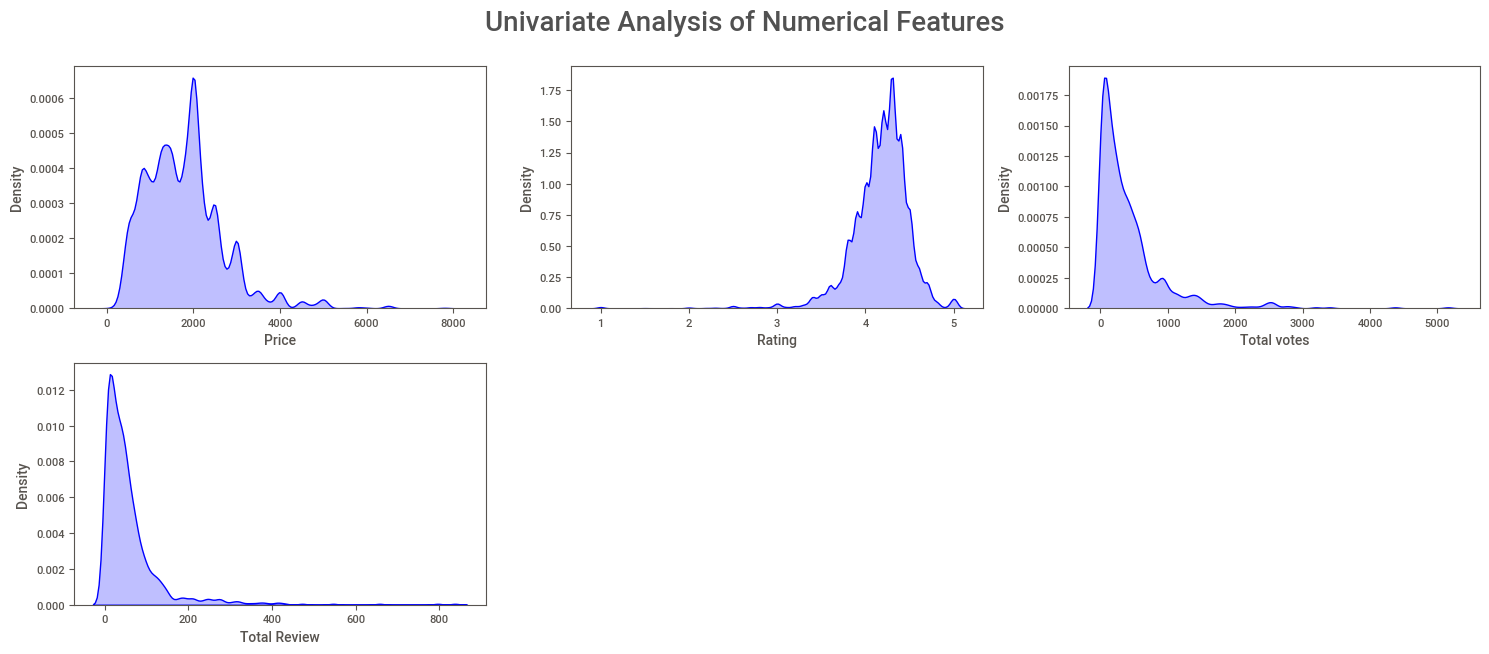

In [213]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numeric_features[i]],shade=True, color='b')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

In [217]:
df.corr()

,Price,Rating,Total votes,Total Review
Price,1.000000,0.116308,0.169809,0.135387
Rating,0.116308,1.000000,0.029310,-0.055547
Total votes,0.169809,0.029310,1.000000,0.877580
Total Review,0.135387,-0.055547,0.877580,1.000000


In [220]:
from scipy.stats import chi2_contingency
chi2_test = []
for feature in categorical_features:
    if chi2_contingency(pd.crosstab(df['Price'], df[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[categorical_features, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,Name,Reject Null Hypothesis
1,Location,Reject Null Hypothesis
2,Cuisine Type,Reject Null Hypothesis
3,Link,Reject Null Hypothesis
4,User Name,Fail to Reject Null Hypothesis
5,Post Date,Reject Null Hypothesis
6,Review,Reject Null Hypothesis


In [221]:
continues_features=[feature for feature in numeric_features if len(df[feature].unique())>=10]
print('Num of continues features :',continues_features)

Num of continues features : ['Price', 'Rating', 'Total votes', 'Total Review']


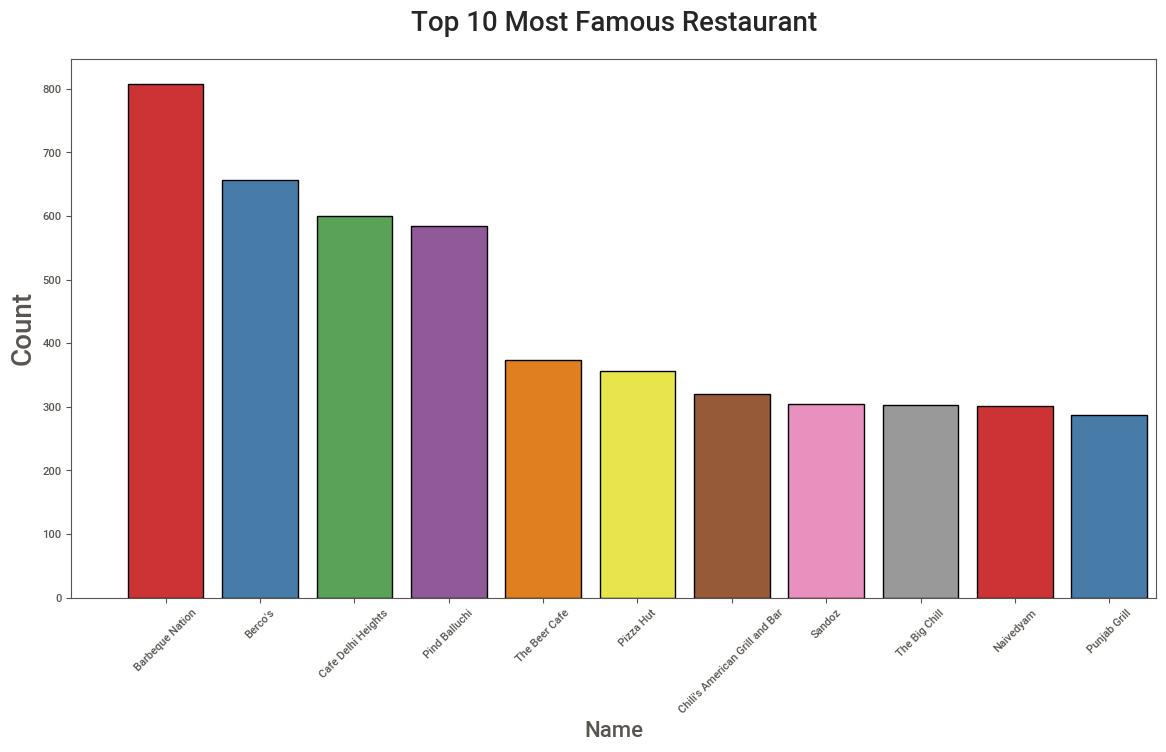

In [226]:
plt.subplots(figsize=(14,7))
sns.countplot(x="Name", data=df,ec = "black",palette="Set1",order = df['Name'].value_counts().index)
plt.title("Top 10 Most Famous Restaurant", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=20)
plt.xlabel("Name", weight="bold", fontsize=16)
plt.xticks(rotation= 45)
plt.xlim(-1,10.5)
plt.show()

In [234]:
Name_price = df.groupby('Name').Price.max()
Name_price_df = Name_price.to_frame().sort_values('Price',ascending=False)[0:10]
Name_price_df

,Price
Name,
Fly Dining,8000
Orient Express,7800
Dum Pukht,6500
Bukhara,6500
Ottimo at West View,6500
Le Cirque,6000
Kheer,5800
Jamavar,5500
OKO,5200


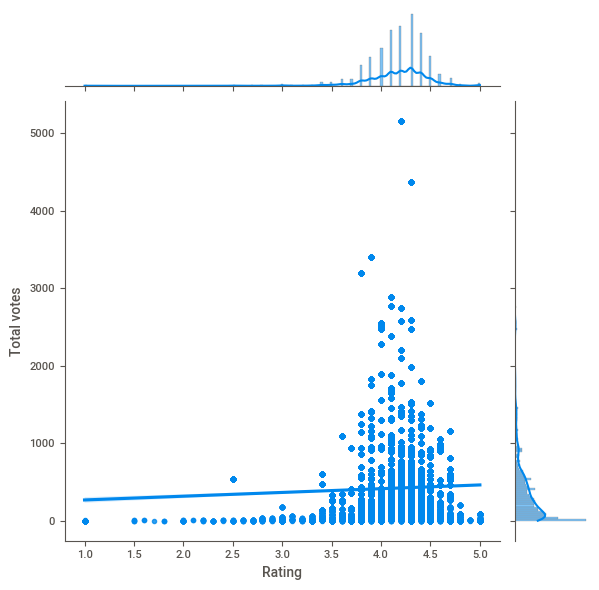

In [235]:
sns.jointplot(x='Rating',y='Total votes',data=df, kind='reg')

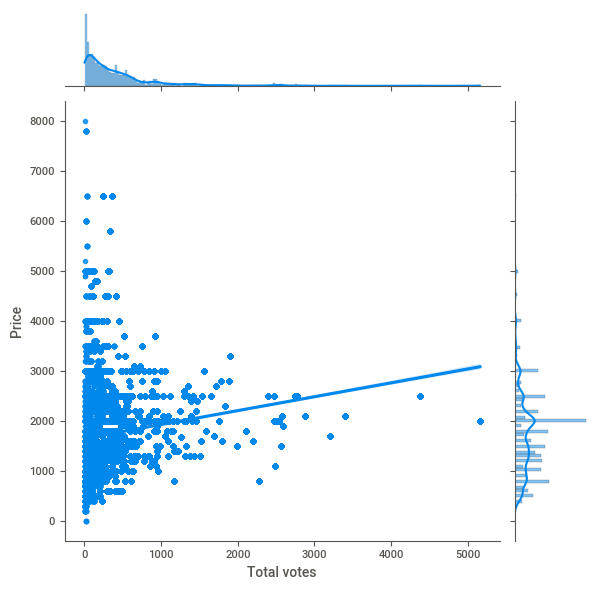

In [236]:
sns.jointplot(x='Total votes',y='Price',data=df, kind='reg')

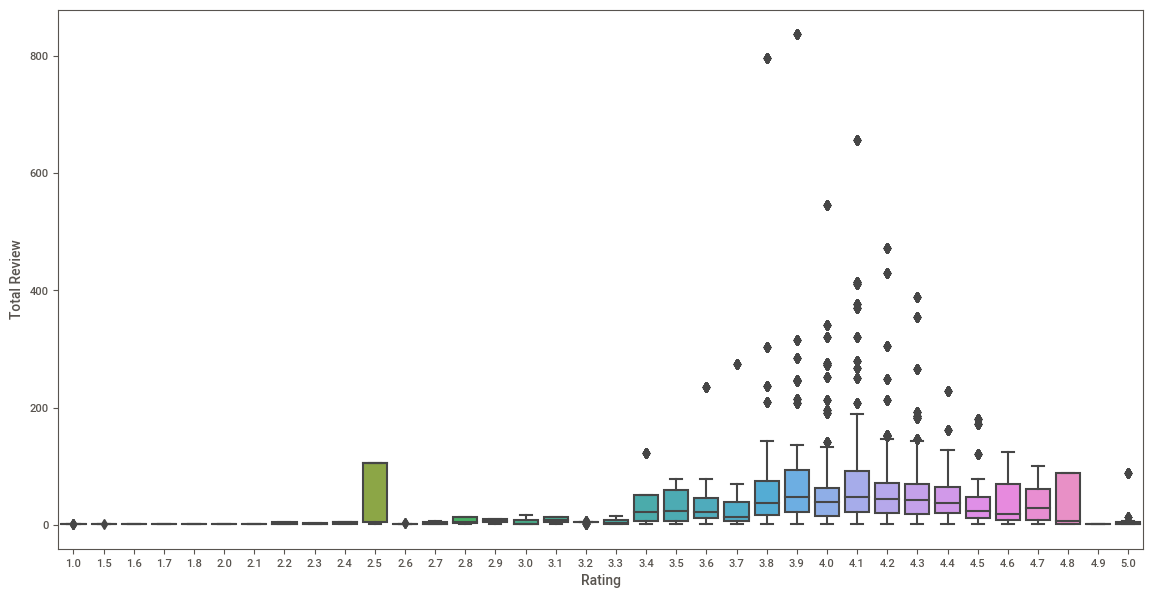

In [237]:
sns.boxplot(x='Rating', y='Total Review', data=df)
plt.show()

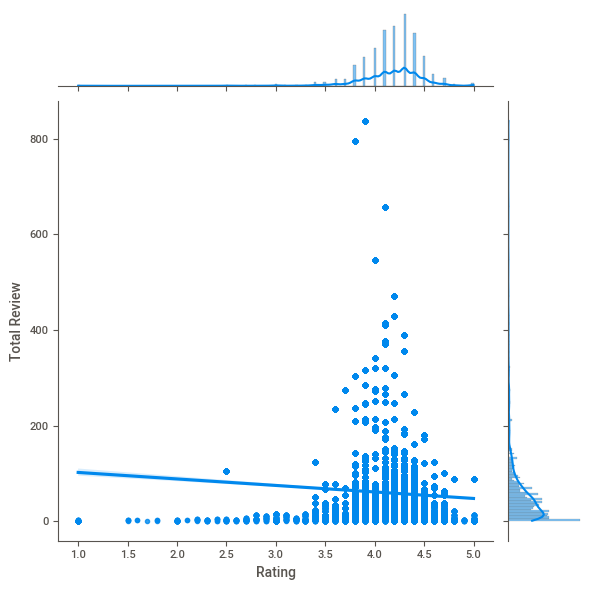

In [238]:
sns.jointplot(x='Rating', y='Total Review', data=df, kind='reg')

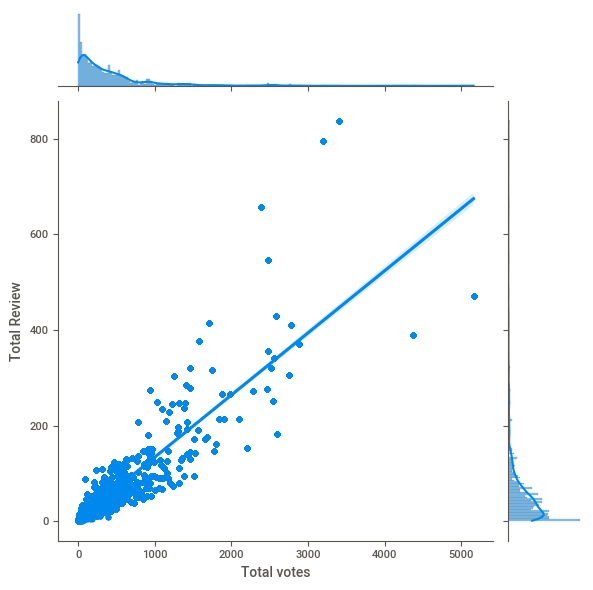

In [239]:
sns.jointplot(x='Total votes',y='Total Review',data=df, kind='reg')

<AxesSubplot:xlabel='Total Review', ylabel='count'>

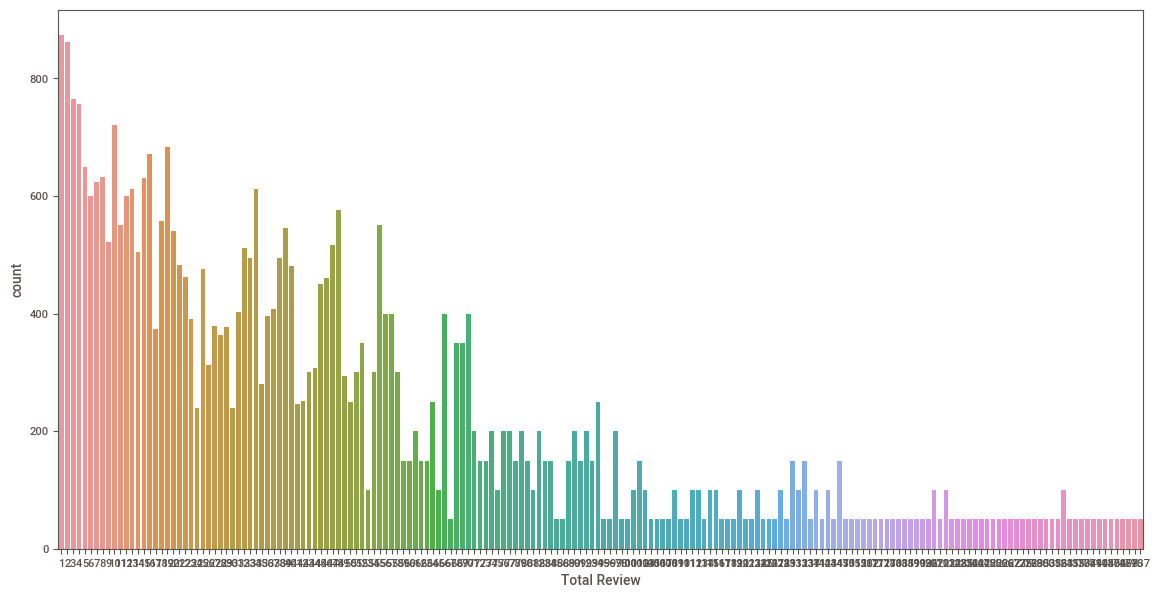

In [240]:
sns.countplot(x='Total Review',data=df)

In [241]:
df.corr()

,Price,Rating,Total votes,Total Review
Price,1.000000,0.116308,0.169809,0.135387
Rating,0.116308,1.000000,0.029310,-0.055547
Total votes,0.169809,0.029310,1.000000,0.877580
Total Review,0.135387,-0.055547,0.877580,1.000000


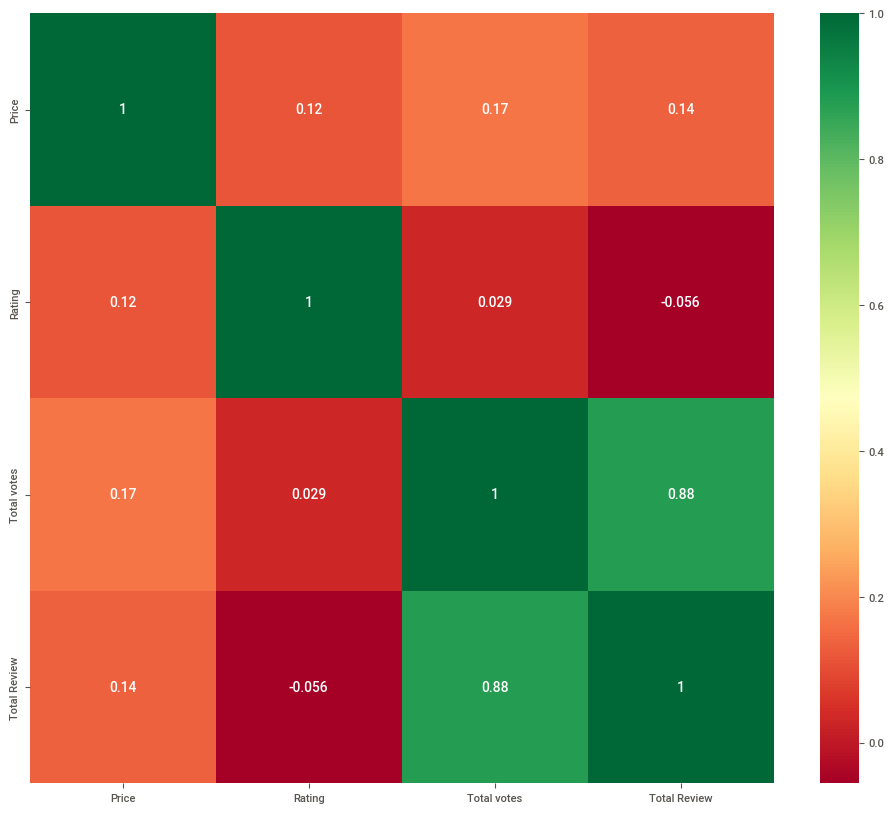

In [242]:
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')  # seaborn has very simple solution for heatmap

In [243]:
df.columns

Index(['Name', 'Location', 'Price', 'Cuisine Type', 'Rating', 'Total votes',
       'Total Review', 'Link', 'User Name', 'Post Date', 'Review'],
      dtype='object')

# Distribution of Rating

/Users/abhisheknegi/opt/anaconda3/envs/test/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  This is separate from the ipykernel package so we can avoid doing imports until


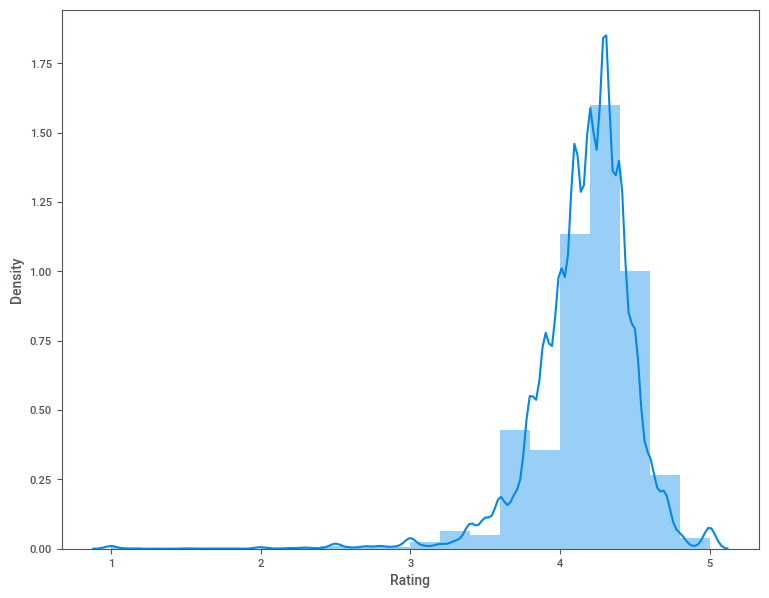

In [244]:
# # Lets Explore our target variable - How ratings are distributed
plt.figure(figsize=(9,7))
sns.distplot(df['Rating'],bins=20)
plt.show()

/Users/abhisheknegi/opt/anaconda3/envs/test/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  This is separate from the ipykernel package so we can avoid doing imports until


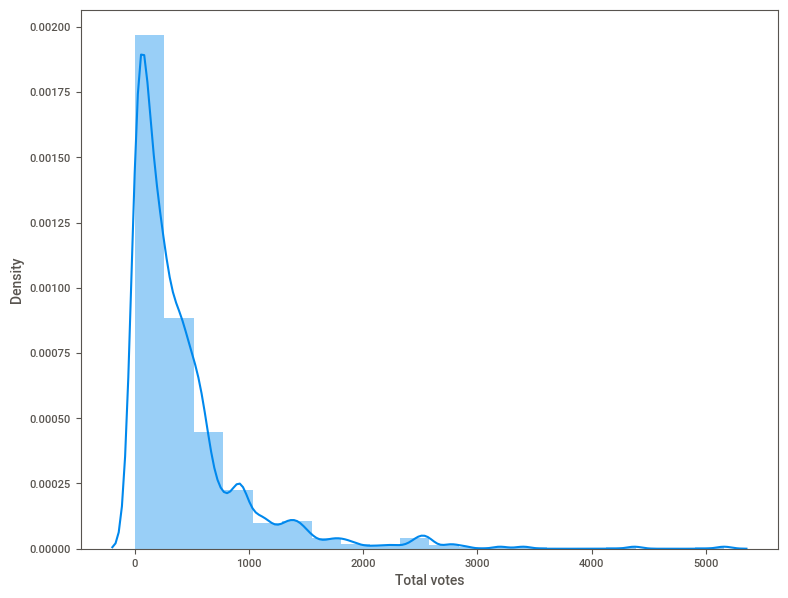

In [245]:
# # Lets Explore our target variable - How ratings are distributed
plt.figure(figsize=(9,7))
sns.distplot(df['Total votes'],bins=20)
plt.show()

/Users/abhisheknegi/opt/anaconda3/envs/test/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  This is separate from the ipykernel package so we can avoid doing imports until


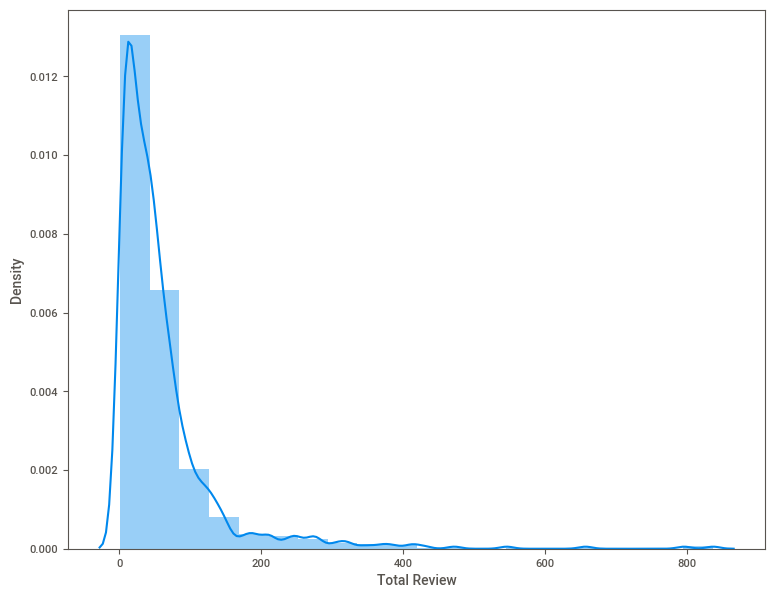

In [246]:
# # Lets Explore our target variable - How ratings are distributed
plt.figure(figsize=(9,7))
sns.distplot(df['Total Review'],bins=20)
plt.show()

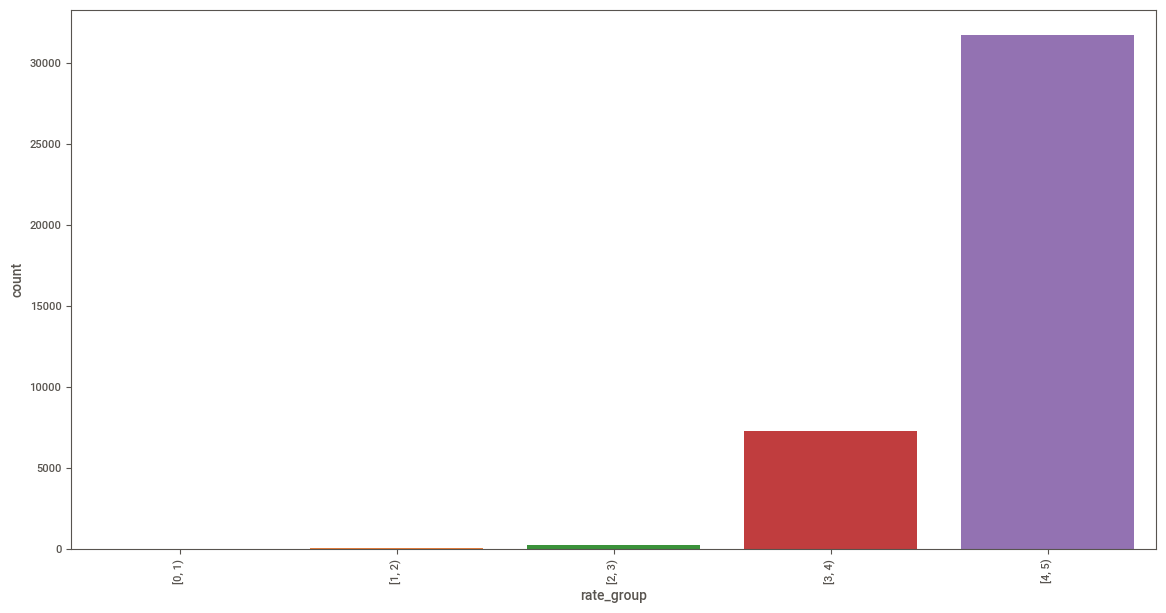

In [247]:
# Pandas cut to draw histogram of different range between 1 to 5
bins = list(range(0, 6, 1))
np.random.seed(31415)

df_test = pd.DataFrame({'rate': df['Rating'].astype(float), 
                        'rate_group': pd.cut(df['Rating'].astype(float), bins=bins, right=False)})

ax = sns.countplot(data=df_test, x='rate_group')
ax.tick_params(axis='x', labelrotation=90)

# Most Famous Restaurant

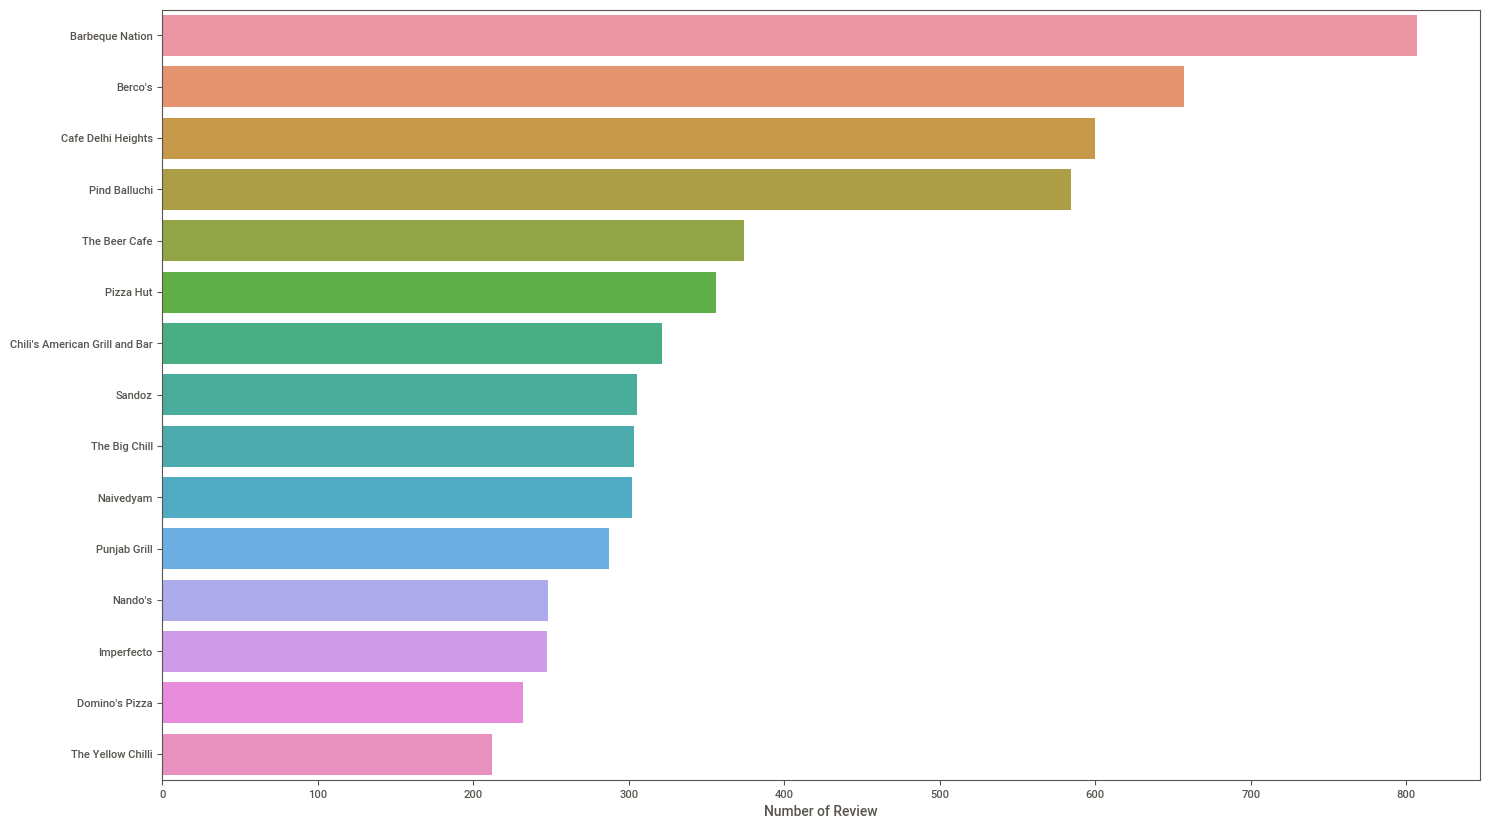

In [248]:
plt.figure(figsize=(17,10))
famous_restaurant = df['Name'].value_counts()[:15]
sns.barplot(x = famous_restaurant,y = famous_restaurant.index)
plt.xlabel("Number of Review")
plt.show()

In [249]:
df[df['Name'] == 'Barbeque Nation']

,Name,Location,Price,Cuisine Type,Rating,Total votes,Total Review,Link,User Name,Post Date,Review
326,Barbeque Nation,"Connaught Place,Central Delhi",2000,"North Indian, Chinese",4.3,633,129,https://www.dineout.co.in/delhi/barbeque-natio...,balram,Posted on 25 Jul 2021,Neither food nor customer service both were no...
361,Barbeque Nation,"Connaught Place,Central Delhi",2000,"North Indian, Chinese",4.3,633,129,https://www.dineout.co.in/delhi/barbeque-natio...,Rohit Kajal,Posted on 11 Jul 2021,Non-veg food is great .\n\nbut \n\nveg food ha...
362,Barbeque Nation,"Connaught Place,Central Delhi",2000,"North Indian, Chinese",4.3,633,129,https://www.dineout.co.in/delhi/barbeque-natio...,SACHIN KAPOOR,Posted on 17 Apr 2021,PRICES ARE HIGH COMPARE TO FOOD & OTHER COMPET...
402,Barbeque Nation,"Connaught Place,Central Delhi",2000,"North Indian, Chinese",4.3,633,129,https://www.dineout.co.in/delhi/barbeque-natio...,Sarika Gulati,Posted on 08 Apr 2021,very nice staff and food quality was very good
403,Barbeque Nation,"Connaught Place,Central Delhi",2000,"North Indian, Chinese",4.3,633,129,https://www.dineout.co.in/delhi/barbeque-natio...,Manoj Saini,Posted on 08 Apr 2021,Mr Shankar & Mr Pradeep serve very well. Their...
...,...,...,...,...,...,...,...,...,...,...,...
36204,Barbeque Nation,"Savoy Suites,Sector 16,Noida",1800,"North Indian, Chinese",4.5,914,180,https://www.dineout.co.in/delhi/barbeque-natio...,Nitin Rastogi,Posted on 21 Dec 2020,it was a pleasant experience. we were served b...
36224,Barbeque Nation,"Savoy Suites,Sector 16,Noida",1800,"North Indian, Chinese",4.5,914,180,https://www.dineout.co.in/delhi/barbeque-natio...,Ajay Vikram,Posted on 13 Dec 2020,excellent
36225,Barbeque Nation,"Savoy Suites,Sector 16,Noida",1800,"North Indian, Chinese",4.5,914,180,https://www.dineout.co.in/delhi/barbeque-natio...,gaurav goyal,Posted on 12 Dec 2020,wonderful
36241,Barbeque Nation,"Savoy Suites,Sector 16,Noida",1800,"North Indian, Chinese",4.5,914,180,https://www.dineout.co.in/delhi/barbeque-natio...,Vani Kapoor,Posted on 22 Nov 2020,Hopeless food!! Had a terrible experience with...


In [250]:
# Restaurant Name based rated Restaurants
restaurants_rating = df.groupby(by = ["Name"])["Rating"].agg(["count", "mean"])
restaurants_rating

,count,mean
Name,,
#3BROS,33,4.1
1 Oak Cafe & Bar,50,4.2
1900 AD- A Kitchen Love Story,1,5.0
1911,15,4.4
21 Gun Salute,46,4.3
...,...,...
Ziuba,16,4.1
Zodiac-All Day Dining,2,4.0
Zooby's Kitchen,8,4.4


Text(0, 0.5, 'Ratings Count')

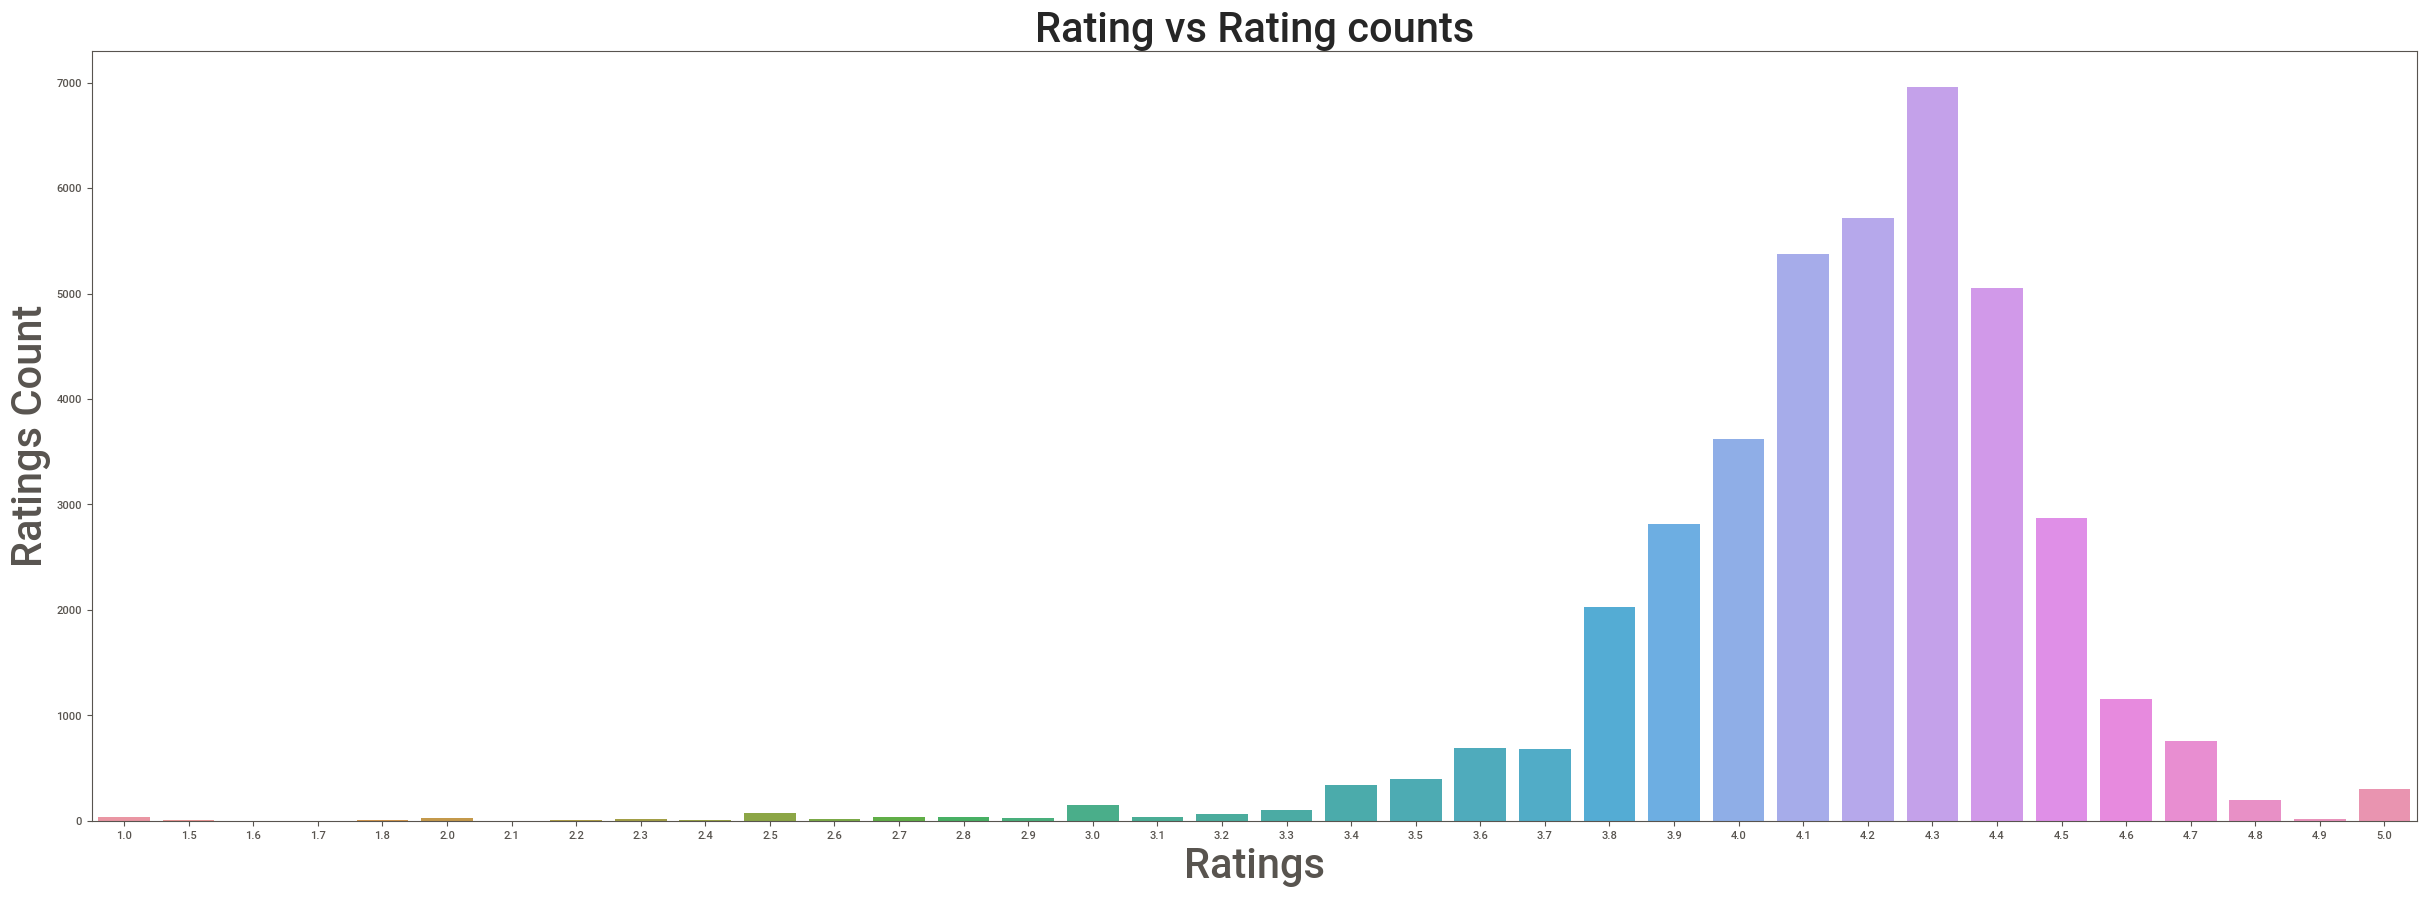

In [251]:
ratings=df.groupby(['Rating']).size().reset_index().rename(columns={0:"Rating_Count"})
plt.figure(figsize=(30,10))
sns.barplot(x='Rating',y='Rating_Count',data=ratings)
plt.title('Rating vs Rating counts',size=30)
plt.xlabel('Ratings',size=30)
plt.ylabel('Ratings Count',size=30)

In [254]:
# Let's word tokenize the given sample after we remove the stopwords and punctuation. 
stop_words = stopwords.words('english')
punct = string.punctuation

def clean_sentence(data):
    clean_data =[]
    for word in nltk.word_tokenize(data):
        if word not in punct:
            if word not in stop_words:
                clean_data.append(word)
    return ' '.join(clean_data)

In [255]:
df['Clean Review'] = df['Review'].apply(clean_sentence)

In [256]:
df.head()

,Name,Location,Price,Cuisine Type,Rating,Total votes,Total Review,Link,User Name,Post Date,Review,Clean Review
0,Ardor 2.1 Restaurant and Lounge,"Connaught Place,Central Delhi",2000,"North Indian, Chinese, Italian, Continental",4.1,1454,321,https://www.dineout.co.in/delhi/ardor-21-resta...,Komal,Posted on 27 Jul 2021,w,w
1,Ardor 2.1 Restaurant and Lounge,"Connaught Place,Central Delhi",2000,"North Indian, Chinese, Italian, Continental",4.1,1454,321,https://www.dineout.co.in/delhi/ardor-21-resta...,Preeti Verma,Posted on 26 Jul 2021,delayed service.\ngood food.,delayed service good food
2,Ardor 2.1 Restaurant and Lounge,"Connaught Place,Central Delhi",2000,"North Indian, Chinese, Italian, Continental",4.1,1454,321,https://www.dineout.co.in/delhi/ardor-21-resta...,Abhinav Agarwal,Posted on 26 Jul 2021,very bad taste. not recommended for food lovers.,bad taste recommended food lovers
3,Ardor 2.1 Restaurant and Lounge,"Connaught Place,Central Delhi",2000,"North Indian, Chinese, Italian, Continental",4.1,1454,321,https://www.dineout.co.in/delhi/ardor-21-resta...,Ashutosh Shandilya,Posted on 24 Jul 2021,chicken was undercooked,chicken undercooked
4,Ardor 2.1 Restaurant and Lounge,"Connaught Place,Central Delhi",2000,"North Indian, Chinese, Italian, Continental",4.1,1454,321,https://www.dineout.co.in/delhi/ardor-21-resta...,VARUN GOYAL,Posted on 20 Jul 2021,They denied to give the discount...gave lame e...,They denied give discount ... gave lame excuses


In [257]:
def perform_sentiment(x):
    testimonial = TextBlob(x)
    #testimonial.sentiment (polarity, subjectvity)
    testimonial.sentiment.polarity
    #sentiment_list.append([sentence, testimonial.sentiment.polarity, testimonial.subjectivity])
    return testimonial.sentiment.polarity

In [258]:
df['Perform Sentiment'] = df['Clean Review'].apply(perform_sentiment)

In [259]:
df.head()

,Name,Location,Price,Cuisine Type,Rating,Total votes,Total Review,Link,User Name,Post Date,Review,Clean Review,Perform Sentiment
0,Ardor 2.1 Restaurant and Lounge,"Connaught Place,Central Delhi",2000,"North Indian, Chinese, Italian, Continental",4.1,1454,321,https://www.dineout.co.in/delhi/ardor-21-resta...,Komal,Posted on 27 Jul 2021,w,w,0.0
1,Ardor 2.1 Restaurant and Lounge,"Connaught Place,Central Delhi",2000,"North Indian, Chinese, Italian, Continental",4.1,1454,321,https://www.dineout.co.in/delhi/ardor-21-resta...,Preeti Verma,Posted on 26 Jul 2021,delayed service.\ngood food.,delayed service good food,0.7
2,Ardor 2.1 Restaurant and Lounge,"Connaught Place,Central Delhi",2000,"North Indian, Chinese, Italian, Continental",4.1,1454,321,https://www.dineout.co.in/delhi/ardor-21-resta...,Abhinav Agarwal,Posted on 26 Jul 2021,very bad taste. not recommended for food lovers.,bad taste recommended food lovers,-0.7
3,Ardor 2.1 Restaurant and Lounge,"Connaught Place,Central Delhi",2000,"North Indian, Chinese, Italian, Continental",4.1,1454,321,https://www.dineout.co.in/delhi/ardor-21-resta...,Ashutosh Shandilya,Posted on 24 Jul 2021,chicken was undercooked,chicken undercooked,-0.6
4,Ardor 2.1 Restaurant and Lounge,"Connaught Place,Central Delhi",2000,"North Indian, Chinese, Italian, Continental",4.1,1454,321,https://www.dineout.co.in/delhi/ardor-21-resta...,VARUN GOYAL,Posted on 20 Jul 2021,They denied to give the discount...gave lame e...,They denied give discount ... gave lame excuses,-0.5


In [260]:
my_report = sweetviz.analyze([df, "EDA"],target_feat='Rating')

                                             |                                                                …

In [261]:
my_report.show_html('Report.html')

Report Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [262]:
profile = ProfileReport(df, title='Pandas Profiling Report', explorative=True)

In [263]:
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [264]:
profile.to_file("output.html")

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [265]:
df['Clean Review Length'] = df['Clean Review'].astype(str).apply(len)
df['Clean Review Word Count'] = df['Clean Review'].apply(lambda x: len(str(x).split()))

In [266]:
df.head()

,Name,Location,Price,Cuisine Type,Rating,Total votes,Total Review,Link,User Name,Post Date,Review,Clean Review,Perform Sentiment,Clean Review Length,Clean Review Word Count
0,Ardor 2.1 Restaurant and Lounge,"Connaught Place,Central Delhi",2000,"North Indian, Chinese, Italian, Continental",4.1,1454,321,https://www.dineout.co.in/delhi/ardor-21-resta...,Komal,Posted on 27 Jul 2021,w,w,0.0,1,1
1,Ardor 2.1 Restaurant and Lounge,"Connaught Place,Central Delhi",2000,"North Indian, Chinese, Italian, Continental",4.1,1454,321,https://www.dineout.co.in/delhi/ardor-21-resta...,Preeti Verma,Posted on 26 Jul 2021,delayed service.\ngood food.,delayed service good food,0.7,25,4
2,Ardor 2.1 Restaurant and Lounge,"Connaught Place,Central Delhi",2000,"North Indian, Chinese, Italian, Continental",4.1,1454,321,https://www.dineout.co.in/delhi/ardor-21-resta...,Abhinav Agarwal,Posted on 26 Jul 2021,very bad taste. not recommended for food lovers.,bad taste recommended food lovers,-0.7,33,5
3,Ardor 2.1 Restaurant and Lounge,"Connaught Place,Central Delhi",2000,"North Indian, Chinese, Italian, Continental",4.1,1454,321,https://www.dineout.co.in/delhi/ardor-21-resta...,Ashutosh Shandilya,Posted on 24 Jul 2021,chicken was undercooked,chicken undercooked,-0.6,19,2
4,Ardor 2.1 Restaurant and Lounge,"Connaught Place,Central Delhi",2000,"North Indian, Chinese, Italian, Continental",4.1,1454,321,https://www.dineout.co.in/delhi/ardor-21-resta...,VARUN GOYAL,Posted on 20 Jul 2021,They denied to give the discount...gave lame e...,They denied give discount ... gave lame excuses,-0.5,47,8


In [267]:
text = " ".join(review for review in df['Clean Review'])

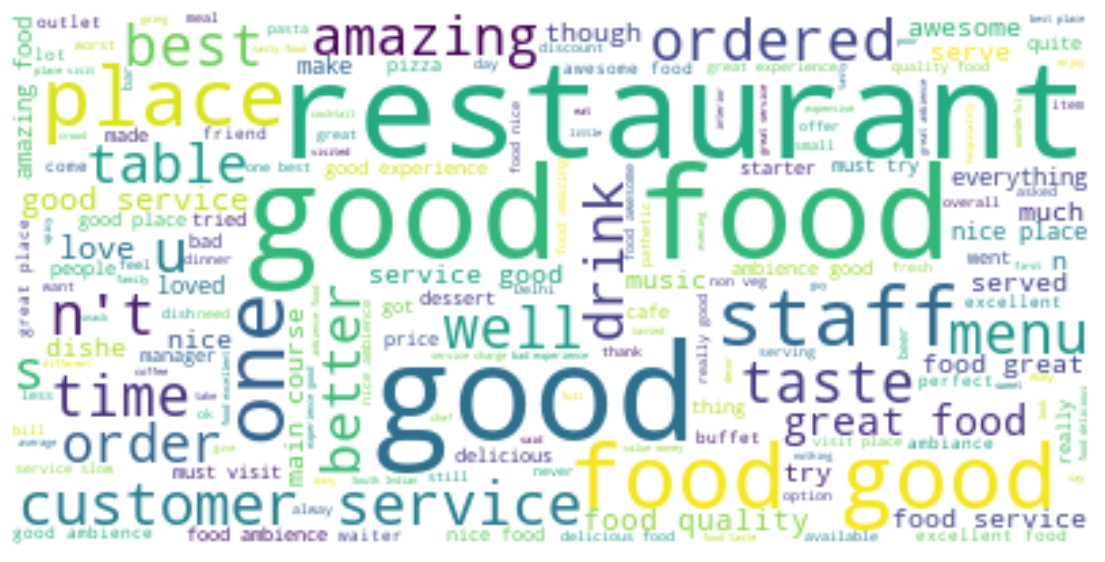

In [268]:
stopwords = set(STOPWORDS)
stopwords = stopwords.union(["ha", "thi", "now", "onli", "im", "becaus", "wa", "will", "even", "go", "realli", "didnt", "abl"])
wordcl = WordCloud(stopwords = stopwords, background_color='white', max_font_size = 50, max_words = 5000).generate(text)
plt.figure(figsize=(14, 12))
plt.imshow(wordcl, interpolation='bilinear')
plt.axis('off')
plt.show()